# 8.1 종목정보 데이터 분석

In [166]:
import pandas as pd
import numpy as np

KOR_ticker = pd.read_csv('data/KOR_ticker.csv', index_col=0)
KOR_ticker['종목코드'] = KOR_ticker['종목코드'].astype(np.str).str.zfill(6)

In [167]:
KOR_sector = pd.read_csv('data/KOR_sector.csv', index_col=0)
KOR_sector['CMP_CD'] = KOR_sector['CMP_CD'].astype(np.str).str.zfill(6)

- 데이터 합치기

In [168]:
data_market = pd.merge(KOR_ticker, KOR_sector, left_on=['종목코드','종목명'], right_on = ['CMP_CD','CMP_KOR'], how='left')

In [169]:
data_market.head()

,종목코드,종목명,시장구분,업종명,종가,대비,등락률,시가총액,EPS,PER,...,CMP_KOR,MKT_VAL,WGT,S_WGT,CAL_WGT,SEC_CD,SEC_NM_KOR,SEQ,TOP60,APT_SHR_CNT
0,005930,삼성전자,KOSPI,전기전자,88800,5900,7.12,530116690440000,3166.0,28.05,...,삼성전자,378782703.0,60.33,60.33,1.0,G45,IT,1.0,0.0,4.477337e+09
1,000660,SK하이닉스,KOSPI,전기전자,138000,3500,2.60,100464326370000,2943.0,46.89,...,SK하이닉스,70033828.0,11.15,71.48,1.0,G45,IT,2.0,0.0,5.387218e+08
2,051910,LG화학,KOSPI,화학,999000,37000,3.85,70521750657000,4085.0,244.55,...,LG화학,45133920.0,36.70,36.70,1.0,G15,소재,1.0,5.0,4.517910e+07
3,207940,삼성바이오로직스,KOSPI,의약품,837000,18000,2.20,55380105000000,3067.0,272.91,...,삼성바이오로직스,13646531.0,8.77,41.20,1.0,G35,건강관리,3.0,16.0,1.654125e+07
4,005380,현대차,KOSPI,운수장비,246000,40000,19.42,52562374002000,11310.0,21.75,...,현대차,34620656.0,19.76,19.76,1.0,G25,경기관련소비재,1.0,6.0,1.410210e+08


- ROE 컬럼 만들기

In [171]:
data_market['ROE'] = data_market['PBR'] / data_market['PER']

In [172]:
data_market.loc[:, ['종목명', 'ROE']].head()

,종목명,ROE
0,삼성전자,0.084492
1,SK하이닉스,0.044786
2,LG화학,0.018810
3,삼성바이오로직스,0.046609
4,현대차,0.044598


- 간단한 필터

In [173]:
data_market.loc[data_market.PBR < 1, ['종목명', 'PBR']].head()

,종목명,PBR
4,현대차,0.97
11,기아차,0.96
13,POSCO,0.58
18,SK텔레콤,0.93
20,KB금융,0.50


In [174]:
data_market.loc[(data_market.PBR < 1) & (data_market.PER < 20) & (data_market.ROE > 0.1), ['종목명', 'PBR', 'PER', 'ROE']].head()

,종목명,PBR,PER,ROE
94,GS건설,0.84,7.47,0.112450
109,대림산업,0.54,4.82,0.112033
117,메리츠증권,0.66,4.07,0.162162
126,신세계,0.62,4.70,0.131915
154,HDC현대산업개발,0.60,3.22,0.186335


- 요약 통곗값 계산

In [175]:
data_market['PBR'].describe()

count    2145.000000
mean        3.765753
std        17.823384
min         0.140000
25%         0.800000
50%         1.520000
75%         2.910000
max       577.590000
Name: PBR, dtype: float64

In [176]:
data_market.loc[:, ['종목명', 'PBR']].sort_values('PBR').head()

,종목명,PBR
1818,감마누,0.14
1865,휴스틸,0.15
2168,지스마트글로벌,0.15
641,세아홀딩스,0.16
1732,경동인베스트,0.18


In [177]:
data_market.loc[:, ['종목명', 'ROE']].sort_values('ROE', ascending=False).head()

,종목명,ROE
2080,이엠앤아이,4.414634
377,한진중공업,1.755396
1100,양지사,0.738739
475,이엔드디,0.665945
151,명신산업,0.634926


- 순위 계산

In [178]:
data_market['PBR_rank'] = data_market['PBR'].rank()
data_market.loc[:, ['종목명', 'PBR', 'PBR_rank']].sort_values('PBR_rank').head()

,종목명,PBR,PBR_rank
1818,감마누,0.14,1.0
1865,휴스틸,0.15,2.5
2168,지스마트글로벌,0.15,2.5
641,세아홀딩스,0.16,4.0
1732,경동인베스트,0.18,5.5


In [179]:
data_market['PBR_rank'] = data_market['PBR'].rank(method = 'first')
data_market.loc[:, ['종목명', 'PBR', 'PBR_rank']].sort_values('PBR_rank').head()

,종목명,PBR,PBR_rank
1818,감마누,0.14,1.0
1865,휴스틸,0.15,2.0
2168,지스마트글로벌,0.15,3.0
641,세아홀딩스,0.16,4.0
1732,경동인베스트,0.18,5.0


In [180]:
data_market['ROE_rank'] = data_market['ROE'].rank(ascending = False)
data_market.loc[:, ['종목명', 'ROE', 'ROE_rank']].sort_values('ROE_rank').head()

,종목명,ROE,ROE_rank
2080,이엠앤아이,4.414634,1.0
377,한진중공업,1.755396,2.0
1100,양지사,0.738739,3.0
475,이엔드디,0.665945,4.0
151,명신산업,0.634926,5.0


- 분위수 계산

In [181]:
data_market['quantile'] = pd.qcut(data_market['PBR'], 5, labels=range(1, 6))
data_market.loc[:, ['종목명', 'PBR', 'quantile']]

,종목명,PBR,quantile
0,삼성전자,2.37,4
1,SK하이닉스,2.10,4
2,LG화학,4.60,5
3,삼성바이오로직스,12.72,5
4,현대차,0.97,2
...,...,...,...
2168,지스마트글로벌,0.15,1
2169,에스제이케이,0.50,1
2170,제이웨이,0.50,1
2171,케이프이에스제4호,NaN,NaN


- 그룹별 계산

In [182]:
data_market.groupby('SEC_NM_KOR')['종목명'].count()

SEC_NM_KOR
IT           554
건강관리         267
경기관련소비재      335
금융            77
산업재          347
소재           226
에너지           26
유틸리티          20
커뮤니케이션서비스    113
필수소비재         97
Name: 종목명, dtype: int64

In [183]:
data_market.groupby('SEC_NM_KOR', dropna=False)['종목명'].count()

SEC_NM_KOR
IT           554
건강관리         267
경기관련소비재      335
금융            77
산업재          347
소재           226
에너지           26
유틸리티          20
커뮤니케이션서비스    113
필수소비재         97
NaN          111
Name: 종목명, dtype: int64

In [184]:
data_market.groupby('SEC_NM_KOR')['PBR'].median()

SEC_NM_KOR
IT           1.960
건강관리         3.810
경기관련소비재      1.060
금융           0.665
산업재          1.080
소재           0.920
에너지          1.290
유틸리티         0.535
커뮤니케이션서비스    1.960
필수소비재        1.000
Name: PBR, dtype: float64

In [185]:
data_market.groupby(['시장구분', 'SEC_NM_KOR'])['PBR'].median()

시장구분    SEC_NM_KOR
KOSDAQ  IT            2.000
        건강관리          4.580
        경기관련소비재       1.465
        금융            1.580
        산업재           1.305
        소재            1.240
        에너지           1.555
        유틸리티          0.980
        커뮤니케이션서비스     2.240
        필수소비재         1.455
KOSPI   IT            1.805
        건강관리          2.720
        경기관련소비재       0.830
        금융            0.530
        산업재           0.915
        소재            0.820
        에너지           0.770
        유틸리티          0.470
        커뮤니케이션서비스     1.690
        필수소비재         0.860
Name: PBR, dtype: float64

## 8.2 종목정보 시각화

<AxesSubplot:xlabel='ROE', ylabel='PBR'>

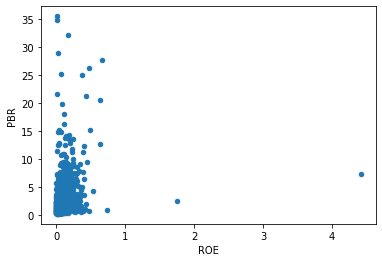

In [186]:
data_market.plot.scatter(x = 'ROE', y = 'PBR')

<AxesSubplot:xlabel='ROE', ylabel='PBR'>

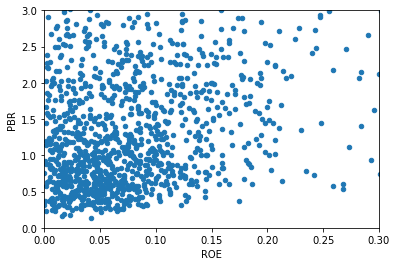

In [187]:
data_market.plot.scatter(x = 'ROE', y = 'PBR', xlim = [0, 0.3], ylim = [0, 3])